# XGBOOST PREDICTION ANALYSIS

## Importing Dependencies

In [1]:
#Importing Dependencies

#%matplotlib inline
#import plotly.express as px


#import tqdm.notebook as tqdm
#from sklearn.preprocessing import MinMaxScaler
#from dateutil.parser import parse

#from _future_ import absolute_import, division, print_function, unicode_literals
#import matplotlib as mpl
#import os

#from math import sqrt
#import statsmodels.api as sm
#from sklearn.metrics import mean_squared_error
#from statsmodels.tsa.holtwinters import ExponentialSmoothing




#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, mean_absolute_error

#from statsmodels.tsa.arima.model import ARIMA

from datetime import datetime


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

## Loading the Dataset

In [2]:
df2= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2012.csv", parse_dates=["Date"])
df3= pd.read_csv(r"Cheltenham Swindon Road Hourly 2013.csv", parse_dates=["Date"])
df4= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2014.csv", parse_dates=["Date"])
df5= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2015.csv", parse_dates=["Date"]) 
df6= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2016.csv", parse_dates=["Date"])
df7= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2017.csv", parse_dates=["Date"])
df8= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2018 .csv", parse_dates=["Date"])
df9= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2019.csv", parse_dates=["Date"])
df10= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2020.csv", parse_dates=["Date"])
df11= pd.read_csv(r"Cheltenham Swindon Road Hourly Means Mass units 2021.csv", parse_dates=["Date"])


C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15/01/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\osesi\anaconda3\Anaconda\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16/01/2012' in DD/MM/Y

In [3]:
#Concatenate all the dataframes
merged_df = pd.concat([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])


In [4]:
merged_df

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
...,...,...,...,...,...,...
8755,2021-12-31,NaN,19,11.0,31.0,48.0
8756,2021-12-31,NaN,20,9.0,19.0,33.0
8757,2021-12-31,NaN,21,5.0,13.0,21.0
8758,2021-12-31,NaN,22,2.0,13.0,17.0


In [5]:
df_data = merged_df.copy()
df_data

,Date,Month,Hour,Nitric Oxide m-3 (20'C 1013mb),Nitrogen Dioxide m-3 (20'C 1013mb),Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)
0,2012-01-01,Jan-12,0,4.0,8.0,13.0
1,2012-01-01,NaN,1,4.0,8.0,13.0
2,2012-01-01,NaN,2,4.0,8.0,13.0
3,2012-01-01,NaN,3,2.0,6.0,10.0
4,2012-01-01,NaN,4,1.0,6.0,8.0
...,...,...,...,...,...,...
8755,2021-12-31,NaN,19,11.0,31.0,48.0
8756,2021-12-31,NaN,20,9.0,19.0,33.0
8757,2021-12-31,NaN,21,5.0,13.0,21.0
8758,2021-12-31,NaN,22,2.0,13.0,17.0


## Data Pre-Processing
#Data columns that were not required to satisfy the objectives of this analysis were dropped
#Columns with lengthy names were renamed
#Missing Values were identified and forward fill method was used to fill the missing values
#Date columns were cast to a datetime format and set as the index column

In [6]:
df_data.drop(["Nitric Oxide m-3 (20'C 1013mb)"], axis=1, inplace=True)
df_data.drop(["Nitrogen Oxides (NOx as NO2) m-3 (20'C 1013mb)"], axis=1, inplace=True)
df_data.drop(['Month'], axis=1, inplace=True)
#df_data.drop(['Hour'], axis=1, inplace=True)
df_data

,Date,Hour,Nitrogen Dioxide m-3 (20'C 1013mb)
0,2012-01-01,0,8.0
1,2012-01-01,1,8.0
2,2012-01-01,2,8.0
3,2012-01-01,3,6.0
4,2012-01-01,4,6.0
...,...,...,...
8755,2021-12-31,19,31.0
8756,2021-12-31,20,19.0
8757,2021-12-31,21,13.0
8758,2021-12-31,22,13.0


###Renaming the Column

In [7]:
# Renaming Columns
df_data.rename(columns = {"Nitrogen Dioxide m-3 (20'C 1013mb)": 'NO2'}, inplace=True)

In [8]:
##CHECKING FOR MISSING VALUES
df_data.isnull().sum().sum()

2370

In [9]:
df_data['NO2'] = df_data['NO2'].replace(0.0, float('NaN'))

print(df_data)

           Date  Hour   NO2
0    2012-01-01     0   8.0
1    2012-01-01     1   8.0
2    2012-01-01     2   8.0
3    2012-01-01     3   6.0
4    2012-01-01     4   6.0
...         ...   ...   ...
8755 2021-12-31    19  31.0
8756 2021-12-31    20  19.0
8757 2021-12-31    21  13.0
8758 2021-12-31    22  13.0
8759 2021-12-31    23  11.0

[87672 rows x 3 columns]


In [10]:
df_data["NO2"].fillna(method="ffill", inplace=True)

In [11]:
df=df_data

# Convert "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Merge "Date" and "Hour" columns into a single datetime column
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='H')

# Drop the original "Date" and "Hour" columns
df = df.drop(['Date', 'Hour'], axis=1)

# Print the updated DataFrame
print(df)

       NO2            Datetime
0      8.0 2012-01-01 00:00:00
1      8.0 2012-01-01 01:00:00
2      8.0 2012-01-01 02:00:00
3      6.0 2012-01-01 03:00:00
4      6.0 2012-01-01 04:00:00
...    ...                 ...
8755  31.0 2021-12-31 19:00:00
8756  19.0 2021-12-31 20:00:00
8757  13.0 2021-12-31 21:00:00
8758  13.0 2021-12-31 22:00:00
8759  11.0 2021-12-31 23:00:00

[87672 rows x 2 columns]


In [12]:
df_data=df

In [13]:
df_data = df_data.set_index('Datetime')


In [14]:
df_data.index = pd.to_datetime(df_data.index)

## Data Visualisation

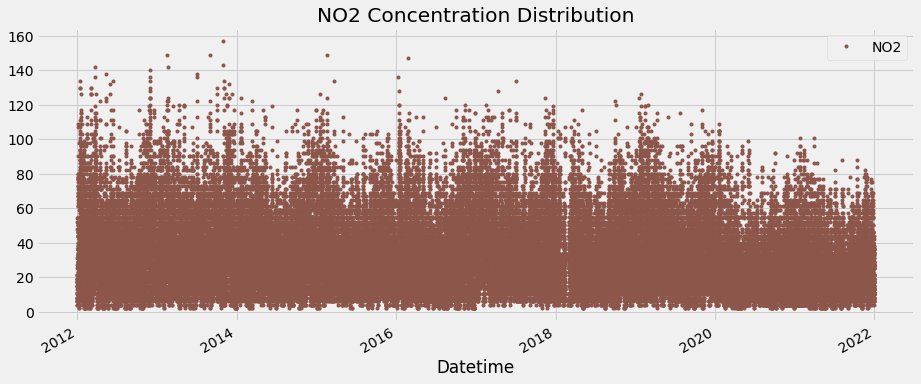

In [15]:
df_data.plot(style='.',
            figsize=(14, 6),
            color=color_pal[5],
            title='NO2 Concentration Distribution')
plt.show()

## Prediction Modelling
#Train and Test Split using timeseries cross validation 
#Temporal features were created using the index column; These features comprised of the day of the week, months, quarter, day of the year and week of the year and seasons.
#Lag features were created from the index column
#Trainning the trainning data using a varied number of estimators
#Predicting the test data

In [16]:
from sklearn.model_selection import TimeSeriesSplit



In [17]:
tss = TimeSeriesSplit(n_splits=3, test_size=24*365*2, gap=24)
df_data = df_data.sort_index()

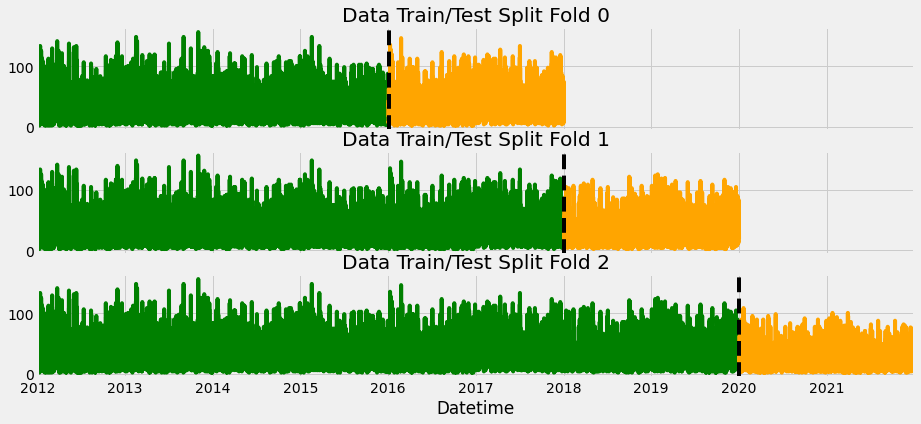

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(14, 6), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(df_data):
    train = df_data.iloc[train_idx]
    test = df_data.iloc[val_idx]
    train['NO2'].plot(ax=axs[fold],
                      label='Training Set',
                      title=f'Data Train/Test Split Fold {fold}',
                      color='green')  # Change the color of the training set plot
    test['NO2'].plot(ax=axs[fold],
                     label='Test Set',
                     color='orange')  # Change the color of the test set plot
    axs[fold].axvline(test.index.min(), color='black', ls='--')  # Change the color of the vertical line
    fold += 1
plt.show()

In [19]:
def create_features(df_data):
    """
    Create time series features based on time series index.
    """
    df_data = df_data.copy()
    df_data['hour'] = df_data.index.hour
    df_data['dayofweek'] = df_data.index.dayofweek
    df_data['quarter'] = df_data.index.quarter
    df_data['month'] = df_data.index.month
    df_data['year'] = df_data.index.year
    df_data['dayofyear'] = df_data.index.dayofyear
    df_data['dayofmonth'] = df_data.index.day
    df_data['weekofyear'] = df_data.index.isocalendar().week
    return df_data

df_data = create_features(df_data)


In [20]:
 target_map = df_data['NO2'].to_dict()

The lag times below were chosen because they are divisible by 7 it will enable us to get to the same day last year. 

In [21]:
def add_lags(df_data):
    target_map = df_data['NO2'].to_dict()
    df_data['lag1'] = (df_data.index - pd.Timedelta('364 days')).map(target_map)
    df_data['lag2'] = (df_data.index - pd.Timedelta('728 days')).map(target_map)
    df_data['lag3'] = (df_data.index - pd.Timedelta('1092 days')).map(target_map)
    return df_data

In [22]:
df_data = add_lags(df_data)

In [23]:
df_data.head

<bound method NDFrame.head of                       NO2  hour  dayofweek  quarter  month  year  dayofyear  \
Datetime                                                                      
2012-01-01 00:00:00   8.0     0          6        1      1  2012          1   
2012-01-01 01:00:00   8.0     1          6        1      1  2012          1   
2012-01-01 02:00:00   8.0     2          6        1      1  2012          1   
2012-01-01 03:00:00   6.0     3          6        1      1  2012          1   
2012-01-01 04:00:00   6.0     4          6        1      1  2012          1   
...                   ...   ...        ...      ...    ...   ...        ...   
2021-12-31 19:00:00  31.0    19          4        4     12  2021        365   
2021-12-31 20:00:00  19.0    20          4        4     12  2021        365   
2021-12-31 21:00:00  13.0    21          4        4     12  2021        365   
2021-12-31 22:00:00  13.0    22          4        4     12  2021        365   
2021-12-31 23:00:00  1

In [24]:
df_data.tail()

,NO2,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,,
2021-12-31 19:00:00,31.0,19,4,4,12,2021,365,31,52,19.0,33.0,71.0
2021-12-31 20:00:00,19.0,20,4,4,12,2021,365,31,52,19.0,33.0,59.0
2021-12-31 21:00:00,13.0,21,4,4,12,2021,365,31,52,19.0,25.0,44.0
2021-12-31 22:00:00,13.0,22,4,4,12,2021,365,31,52,17.0,21.0,29.0
2021-12-31 23:00:00,11.0,23,4,4,12,2021,365,31,52,11.0,19.0,31.0


In [25]:
tss = TimeSeriesSplit(n_splits=3, test_size=24*364*2, gap=24)
df_data = df_data.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(df_data):
    train = df_data.iloc[train_idx]
    test = df_data.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)
    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'NO2'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)

[23:53:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.50607	validation_1-rmse:40.08288
[100]	validation_0-rmse:22.27203	validation_1-rmse:22.17293
[200]	validation_0-rmse:18.23393	validation_1-rmse:18.29574
[300]	validation_0-rmse:17.41296	validation_1-rmse:17.56450
[400]	validation_0-rmse:17.13763	validation_1-rmse:17.39144
[500]	validation_0-rmse:16.99118	validation_1-rmse:17.34649
[588]	validation_0-rmse:16.86988	validation_1-rmse:17.34741
[23:54:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.36442	validation_1-rmse:38.46386
[100]	validation_0-rmse:22.20211	validation_1-rmse:20.50511
[2

In [26]:
print(f'Score across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{scores}')

Score across folds 15.8032
Fold scores:[17.337070957115973, 16.200171636394604, 13.872402813069794]


In [27]:
tss = TimeSeriesSplit(n_splits=3, test_size=24*364*2, gap=24)
df_data = df_data.sort_index()


fold = 0
preds = []
scores1 = []
for train_idx, val_idx in tss.split(df_data):
    train = df_data.iloc[train_idx]
    test = df_data.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)
    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'NO2'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=500,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score1 = np.sqrt(mean_squared_error(y_test, y_pred))
    scores1.append(score1)

[23:54:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.50607	validation_1-rmse:40.08288
[100]	validation_0-rmse:22.27203	validation_1-rmse:22.17293
[200]	validation_0-rmse:18.23393	validation_1-rmse:18.29574
[300]	validation_0-rmse:17.41296	validation_1-rmse:17.56450
[400]	validation_0-rmse:17.13763	validation_1-rmse:17.39144
[499]	validation_0-rmse:16.99230	validation_1-rmse:17.34713
[23:54:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.36442	validation_1-rmse:38.46386
[100]	validation_0-rmse:22.20211	validation_1-rmse:20.50511
[200]	validation_0-rmse:18.20242	validation_1-rmse:16.87068
[3

In [28]:
print(f'Score1 across folds {np.mean(scores1):0.4f}')
print(f'Fold scores1:{scores1}')

Score1 across folds 15.8246
Fold scores1:[17.347127063456636, 16.25419189149676, 13.872402813069794]


In [29]:
tss = TimeSeriesSplit(n_splits=3, test_size=24*364*2, gap=24)
df_data = df_data.sort_index()


fold = 0
preds = []
scores2 = []
for train_idx, val_idx in tss.split(df_data):
    train = df_data.iloc[train_idx]
    test = df_data.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)
    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'NO2'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=300,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score2 = np.sqrt(mean_squared_error(y_test, y_pred))
    scores2.append(score2)

[23:54:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.50607	validation_1-rmse:40.08288
[100]	validation_0-rmse:22.27203	validation_1-rmse:22.17293
[200]	validation_0-rmse:18.23393	validation_1-rmse:18.29574
[299]	validation_0-rmse:17.41633	validation_1-rmse:17.56645
[23:54:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.36442	validation_1-rmse:38.46386
[100]	validation_0-rmse:22.20211	validation_1-rmse:20.50511
[200]	validation_0-rmse:18.20242	validation_1-rmse:16.87068
[299]	validation_0-rmse:17.40862	validation_1-rmse:16.34139
[23:54:49] WARNING: C:\buildkite-agent\builds\buildkite-window

In [30]:
print(f'Score2 across folds {np.mean(scores):0.4f}')
print(f'Fold scores2:{scores2}')

Score2 across folds 15.8032
Fold scores2:[17.566449013124668, 16.34138746346473, 13.872402813069794]


In [31]:
tss = TimeSeriesSplit(n_splits=3, test_size=24*364*2, gap=24)
df_data = df_data.sort_index()


fold = 0
preds = []
scores3 = []
for train_idx, val_idx in tss.split(df_data):
    train = df_data.iloc[train_idx]
    test = df_data.iloc[val_idx]

    train = create_features(train)
    test = create_features(test)
    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']
    TARGET = 'NO2'

    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=250,
                           early_stopping_rounds=50,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score3 = np.sqrt(mean_squared_error(y_test, y_pred))
    scores3.append(score3)

[23:54:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.50607	validation_1-rmse:40.08288
[100]	validation_0-rmse:22.27203	validation_1-rmse:22.17293
[200]	validation_0-rmse:18.23393	validation_1-rmse:18.29574
[249]	validation_0-rmse:17.69357	validation_1-rmse:17.81556
[23:54:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:40.36442	validation_1-rmse:38.46386
[100]	validation_0-rmse:22.20211	validation_1-rmse:20.50511
[200]	validation_0-rmse:18.20242	validation_1-rmse:16.87068
[249]	validation_0-rmse:17.67543	validation_1-rmse:16.49012
[23:55:02] WARNING: C:\buildkite-agent\builds\buildkite-window

In [32]:
print(f'Score3 across folds {np.mean(scores3):0.4f}')
print(f'Fold scores3:{scores3}')

Score3 across folds 16.0594
Fold scores3:[17.815559490841416, 16.490116812999865, 13.872402813069794]


In [33]:
#Retrain on all data
df_data = create_features(df_data)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year',
            'lag1','lag2','lag3']
TARGET = 'NO2'

X_all = df_data[FEATURES]
y_all = df_data[TARGET]

reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=300,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_all, y_all,
        eval_set=[(X_all, y_all)],
        verbose=100)

[23:55:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:37.98559
[100]	validation_0-rmse:21.13626
[200]	validation_0-rmse:17.43232
[299]	validation_0-rmse:16.67156


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

## Forecasting NO2 Values for the Year 2022

In [34]:
df_data.index.max()

Timestamp('2021-12-31 23:00:00')

In [35]:
#create future dataframe
future = pd.date_range('2021-12-31','2022-12-01', freq='1h')
future_df_data = pd.DataFrame(index=future)
future_df_data['isFuture'] = True
df_data['isFuture'] = False
df_data_and_future = pd.concat([df_data, future_df_data])
df_data_and_future = create_features(df_data_and_future)
df_data_and_future = add_lags(df_data_and_future)

In [36]:
future_w_features = df_data_and_future.query('isFuture').copy()

In [37]:
future_w_features['pred']= reg.predict(future_w_features[FEATURES])

<AxesSubplot:>

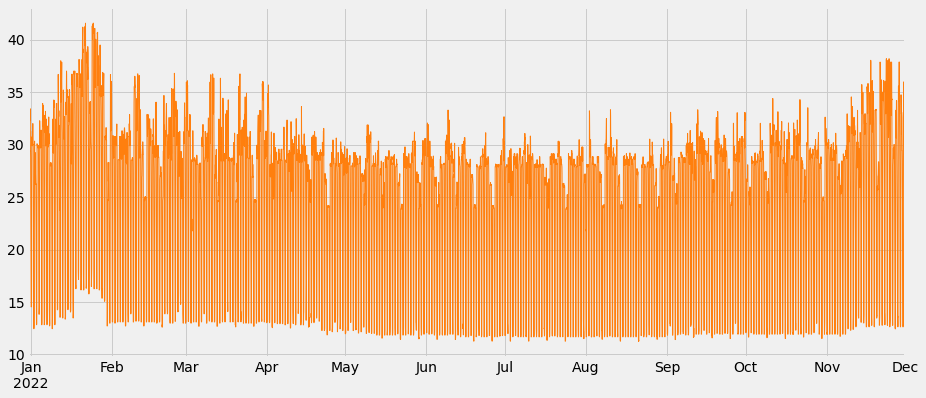

In [38]:
future_w_features['pred'].plot(figsize=(14, 6),
                                     color=color_pal[1],
                                     ms=1,
                                     lw=1,)
                                     

In [39]:
# Save model
reg.save_model('model.json')

In [40]:
!ls -lh

'ls' is not recognized as an internal or external command,
operable program or batch file.


<AxesSubplot:title={'center':'Future Predictions'}>

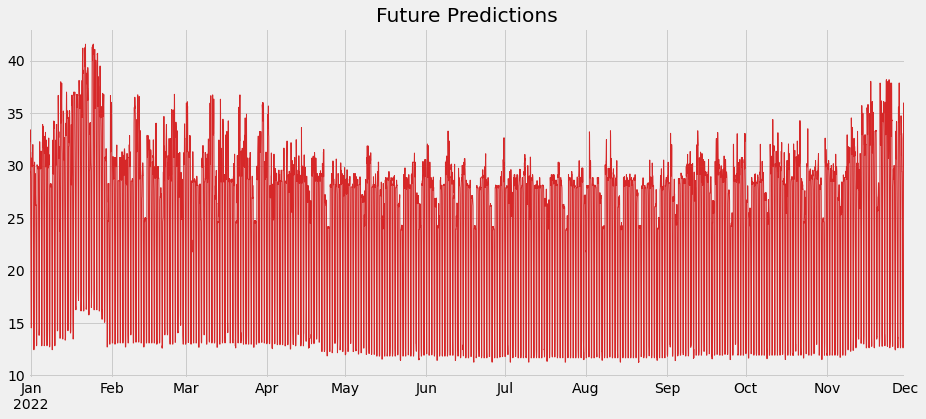

In [41]:
reg_new = xgb.XGBRegressor()
reg_new.load_model('model.json')
future_w_features['pred'] = reg_new.predict(future_w_features[FEATURES])
future_w_features['pred'].plot(figsize=(14, 6),
                               color=color_pal[3],
                               ms=1, lw=1,
                               title='Future Predictions')

## Creating a Feature Importance Analysis

In [42]:
train = create_features(train)
test = create_features(test)

FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'NO2'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]



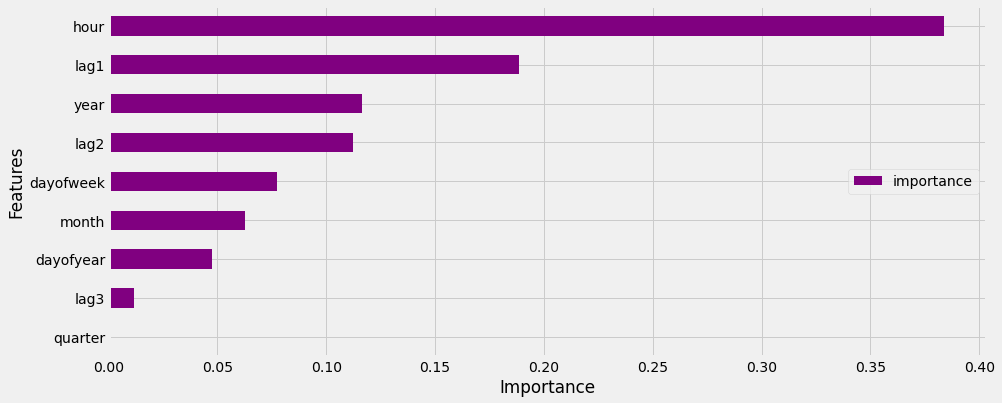

In [43]:
fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_, columns=['importance'])
fi_sorted = fi.sort_values('importance')

ax = fi_sorted.plot(kind='barh', color='purple', figsize=(14, 6))
plt.xlabel('Importance')
plt.ylabel('Features')
ax.legend(loc='center right')

plt.show()